# 1. Import and path setting
Installing Kagglehub and downloading dataset via Kaggle API

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

/Users/yannik/anaconda3/envs/keras_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/yannik/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


Defining the paths to training, validation, and testing folder. Counting the number of folders and files.

In [2]:
import os

# Define the dataset path
root_folder = "/Users/yannik/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2"

data_dir = os.path.join(root_folder, 'new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/')

test_path = os.path.join(root_folder, 'test/test')
train_path = os.path.join(data_dir, 'train')
valid_path = os.path.join(data_dir, 'valid')

# Count the number of folders in a directory
def count_folders(path):
    if os.path.exists(path):
        return len([d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))])
    else:
        print(f"Path does not exist: {path}")
        return 0

# Count the number of files in a directory
def count_files(path):
    if os.path.exists(path):
        return len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    else:
        print(f"Path does not exist: {path}")
        return 0

# Function to count files in each folder of a given directory
def count_files_in_folders(path):
    if not os.path.exists(path):
        print(f"Path does not exist: {path}")
        return {}

    folder_file_counts = {}
    for folder in os.listdir(path):
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path):
            file_count = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
            folder_file_counts[folder] = file_count

    return folder_file_counts

# Print counts
print(f"Number of folders in train_path: {count_folders(train_path)}")
print(f"Number of folders in valid_path: {count_folders(valid_path)}")
print(f"Number of files in test_path: {count_files(test_path)}")
print('-------------------------------------------------------------------')
# Count files in each folder
train_folder_counts = count_files_in_folders(train_path)
valid_folder_counts = count_files_in_folders(valid_path)
# Display results
print("Files in each folder (train_path):")
for folder, count in train_folder_counts.items():
    print(f"{folder}: {count} files")

print("\nFiles in each folder (valid_path):")
for folder, count in valid_folder_counts.items():
    print(f"{folder}: {count} files")

Number of folders in train_path: 38
Number of folders in valid_path: 38
Number of files in test_path: 33
-------------------------------------------------------------------
Files in each folder (train_path):
Strawberry___healthy: 1824 files
Grape___Black_rot: 1888 files
Potato___Early_blight: 1939 files
Blueberry___healthy: 1816 files
Corn_(maize)___healthy: 1859 files
Tomato___Target_Spot: 1827 files
Peach___healthy: 1728 files
Potato___Late_blight: 1939 files
Tomato___Late_blight: 1851 files
Tomato___Tomato_mosaic_virus: 1790 files
Pepper,_bell___healthy: 1988 files
Orange___Haunglongbing_(Citrus_greening): 2010 files
Tomato___Leaf_Mold: 1882 files
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1722 files
Cherry_(including_sour)___Powdery_mildew: 1683 files
Apple___Cedar_apple_rust: 1760 files
Tomato___Bacterial_spot: 1702 files
Grape___healthy: 1692 files
Tomato___Early_blight: 1920 files
Corn_(maize)___Common_rust_: 1907 files
Grape___Esca_(Black_Measles): 1920 files
Raspberry___healt

In [5]:
!pip install pandas numpy matplotlib seaborn tensorflow

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 3.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 3.8 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 4.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 4.3 MB/s eta 0:00:00a 0:00:01
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
ERROR: pip's dependency resolver does not currently take in

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [4]:
import tensorflow as tf
print("GPU Available:", tf.test.is_gpu_available())
print(tf.config.list_physical_devices('GPU'))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU Available: True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-12-09 23:09:42.497938: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-12-09 23:09:42.498000: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-12-09 23:09:42.498014: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-12-09 23:09:42.498253: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-09 23:09:42.498359: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
import PIL
import scipy

print(PIL.__version__)
print(scipy.__version__)

10.4.0
1.10.1


# 2. First simple LeNet model

In [6]:
# Define the image generators for the training and validation set

batch_size = 32
num_classes = 38

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)  # randomize the order of the samples to avoid overfitting

validation_generator = validation_datagen.flow_from_directory(
    valid_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)  # randomize the order of the samples to avoid overfitting

# Define the CNN model which adapts the architecture of a LeNet model

model_lenet = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_lenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model on my GPU cores

with tf.device('/device:GPU:0'):
    model_lenet.fit(train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=20,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


2024-12-04 16:25:12.131921: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-04 16:25:12.131953: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/20


2024-12-04 16:25:12.777027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2196/2196 [==============================] - ETA: 0s - loss: 2.8029 - accuracy: 0.5221

2024-12-04 16:33:39.727968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2196/2196 [==============================] - 552s 250ms/step - loss: 2.8029 - accuracy: 0.5221 - val_loss: 5.2035 - val_accuracy: 0.6523
Epoch 2/20
2196/2196 [==============================] - 610s 278ms/step - loss: 41.3363 - accuracy: 0.6467 - val_loss: 65.2788 - val_accuracy: 0.7595
Epoch 3/20
2196/2196 [==============================] - 672s 306ms/step - loss: 284.3245 - accuracy: 0.7388 - val_loss: 326.8709 - val_accuracy: 0.8148
Epoch 4/20
2196/2196 [==============================] - 700s 319ms/step - loss: 1331.1671 - accuracy: 0.7788 - val_loss: 1286.6937 - val_accuracy: 0.8439
Epoch 5/20
2196/2196 [==============================] - 702s 319ms/step - loss: 3279.4695 - accuracy: 0.8144 - val_loss: 2715.9570 - val_accuracy: 0.8692
Epoch 6/20
2196/2196 [==============================] - 720s 328ms/step - loss: 7451.3101 - accuracy: 0.8275 - val_loss: 6738.3057 - val_accuracy: 0.8682
Epoch 7/20
2196/2196 [==============================] - 707s 322ms/step - loss: 14052.9854 - accura

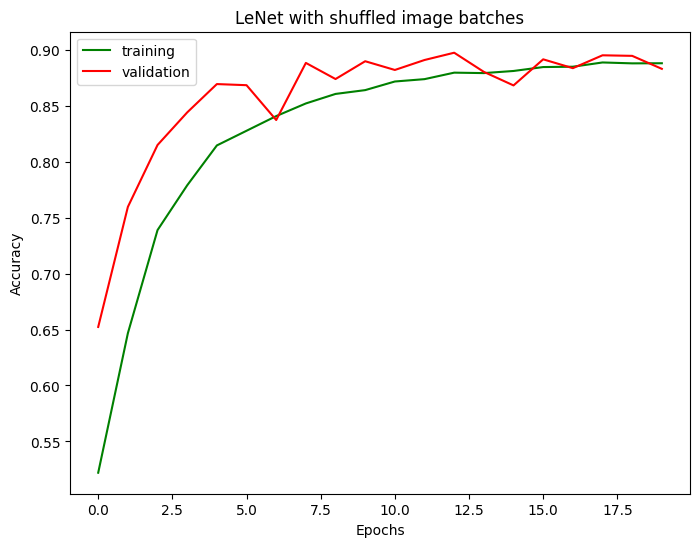

In [10]:
# I forgot to save the history of the fitting process in a history object
# I will manually copy&paste the training and validation accuracy from the verbose output above

train_acc = [0.5221, 0.6467, 0.7388, 0.7788, 0.8144, 0.8275, 0.8406, 0.8519, 0.8604, 0.8638, 0.8715, 0.8736, 0.8794, 0.8790, 0.8809, 0.8844, 0.8847, 0.8885, 0.8877, 0.8878]
val_acc = [0.6523, 0.7595, 0.8148, 0.8439, 0.8692, 0.8682, 0.8371, 0.8881, 0.8737, 0.8896, 0.8818, 0.8907, 0.8972, 0.8801, 0.8680, 0.8913, 0.8834, 0.8949, 0.8944, 0.8828]

plt.figure(figsize=(8, 6))
plt.plot(np.arange(20), train_acc, c="g", label="training")
plt.plot(np.arange(20), val_acc, c="r", label="validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("LeNet with shuffled image batches")
plt.legend()
plt.show()

In [12]:
model_lenet.save("lenet_model_shuffled_batches.h5")

/Users/yannik/anaconda3/envs/keras_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 3 LeNet with augmentation

3.1 EarlyStopping is monitoring val_loss

In [25]:
# Define the image generators for the training and validation set

batch_size = 32
num_classes = 38

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)  # randomize the order of the samples to avoid overfitting

validation_generator = validation_datagen.flow_from_directory(
    valid_path,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)  # randomize the order of the samples to avoid overfitting

# Define the CNN model which adapts the architecture of a LeNet model

model_lenet = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_lenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [26]:
# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001,
    verbose=1
)

# Save model every 10 epochs
checkpoint_periodic = ModelCheckpoint(
    'model_lenet_epoch_{epoch:02d}.h5',
    save_freq='epoch',
    period=10,
    save_best_only=False,
    verbose=1
)

# Save model with best accuracy
checkpoint_best = ModelCheckpoint(
    'model_lenet_best_accuracy.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Combine all callbacks
callbacks = [early_stopping, reduce_lr, checkpoint_periodic, checkpoint_best]

In [27]:
# Training the model on my GPU cores

with tf.device('/device:GPU:0'):
    history = model_lenet.fit(train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=50,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size,
            callbacks=callbacks)

Epoch 1/50


2024-12-10 21:58:29.978496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2196/2196 [==============================] - ETA: 0s - loss: 4.0913 - accuracy: 0.2925

2024-12-10 22:09:12.367470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.28518, saving model to model_lenet_best_accuracy.h5


/Users/yannik/anaconda3/envs/keras_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2196/2196 [==============================] - 759s 345ms/step - loss: 4.0913 - accuracy: 0.2925 - val_loss: 13.7067 - val_accuracy: 0.2852 - lr: 0.0010
Epoch 2/50
2196/2196 [==============================] - ETA: 0s - loss: 114.5785 - accuracy: 0.3504
Epoch 2: val_accuracy improved from 0.28518 to 0.46380, saving model to model_lenet_best_accuracy.h5
2196/2196 [==============================] - 871s 397ms/step - loss: 114.5785 - accuracy: 0.3504 - val_loss: 317.1215 - val_accuracy: 0.4638 - lr: 0.0010
Epoch 3/50
2196/2196 [==============================] - ETA: 0s - loss: 1198.2384 - accuracy: 0.4708
Epoch 3: val_accuracy improved from 0.46380 to 0.52835, saving model to model_lenet_best_accuracy.h5
2196/2196 [==============================] - 875s 398ms/step - loss: 1198.2384 - accuracy: 0.4708 - val_loss: 1966.1979 - val_accuracy: 0.5283 - lr: 0.0010
Epoch 4/50
2196/2196 [==============================] - ETA: 0s - loss: 5208.5273 - accuracy: 0.5353
Epoch 4: val_accuracy improved from

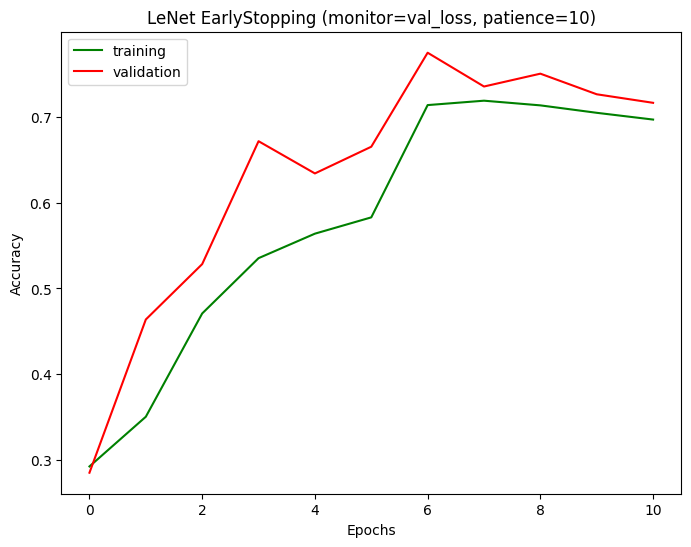

In [36]:
# Having a look at the training and validation accuracy

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(train_acc)), train_acc, c="g", label="training")
plt.plot(np.arange(len(val_acc)), val_acc, c="r", label="validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("LeNet EarlyStopping (monitor=val_loss, patience=10)")
plt.legend()
plt.show()

3.2 EarlyStopping is monitoring val_accuracy

In [30]:
# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001,
    verbose=1
)

# Save model every 10 epochs
checkpoint_periodic = ModelCheckpoint(
    'model_lenet_v2_epoch_{epoch:02d}.h5',
    save_freq='epoch',
    period=10,
    save_best_only=False,
    verbose=1
)

# Save model with best accuracy
checkpoint_best = ModelCheckpoint(
    'model_lenet_v2_best_accuracy.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Combine all callbacks
callbacks = [early_stopping, reduce_lr, checkpoint_periodic, checkpoint_best]

In [31]:
# Training the model on my GPU cores

with tf.device('/device:GPU:0'):
    history_v2 = model_lenet_v2.fit(train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=50,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size,
            callbacks=callbacks)

Epoch 1/50


2024-12-11 08:13:05.333337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2196/2196 [==============================] - ETA: 0s - loss: 2.7272 - accuracy: 0.2804

2024-12-11 08:22:05.632662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.44194, saving model to model_lenet_v2_best_accuracy.h5


/Users/yannik/anaconda3/envs/keras_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2196/2196 [==============================] - 654s 297ms/step - loss: 2.7272 - accuracy: 0.2804 - val_loss: 2.3236 - val_accuracy: 0.4419 - lr: 0.0010
Epoch 2/50
2196/2196 [==============================] - ETA: 0s - loss: 10.9361 - accuracy: 0.4175
Epoch 2: val_accuracy improved from 0.44194 to 0.47735, saving model to model_lenet_v2_best_accuracy.h5
2196/2196 [==============================] - 736s 335ms/step - loss: 10.9361 - accuracy: 0.4175 - val_loss: 19.1819 - val_accuracy: 0.4773 - lr: 0.0010
Epoch 3/50
2196/2196 [==============================] - ETA: 0s - loss: 72.1126 - accuracy: 0.5230
Epoch 3: val_accuracy improved from 0.47735 to 0.64959, saving model to model_lenet_v2_best_accuracy.h5
2196/2196 [==============================] - 759s 346ms/step - loss: 72.1126 - accuracy: 0.5230 - val_loss: 83.2206 - val_accuracy: 0.6496 - lr: 0.0010
Epoch 4/50
2196/2196 [==============================] - ETA: 0s - loss: 275.2869 - accuracy: 0.6096
Epoch 4: val_accuracy improved from 0.64

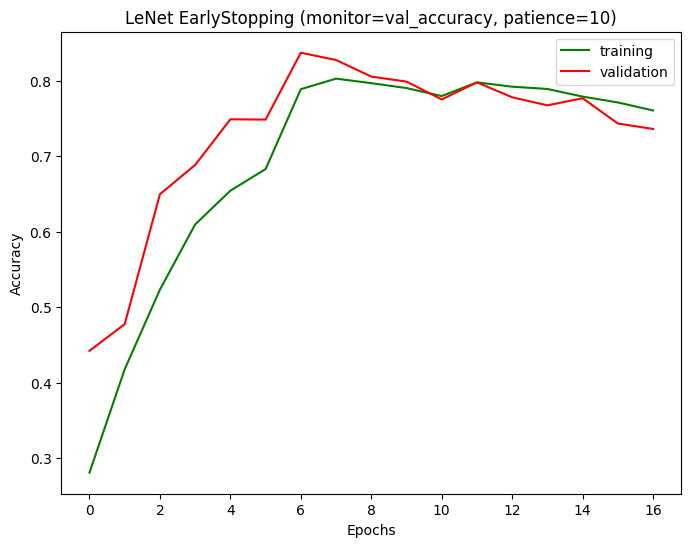

In [37]:
# Having a look at the training and validation accuracy

train_acc = history_v2.history['accuracy']
val_acc = history_v2.history['val_accuracy']

plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(train_acc)), train_acc, c="g", label="training")
plt.plot(np.arange(len(val_acc)), val_acc, c="r", label="validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("LeNet EarlyStopping (monitor=val_accuracy, patience=10)")
plt.legend()
plt.show()

# 4 LeNet without augmentation

In [ ]:
import keras
keras.backend.clear_session()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import scipy

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import Sequence
from keras.models import load_model

from sklearn.model_selection import train_test_split

In [38]:
# Define the image generators for the training and validation set

batch_size = 32
num_classes = 38

train_datagen = ImageDataGenerator(rescale=1./255,)
validation_datagen = ImageDataGenerator(rescale=1./255,)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)  # randomize the order of the samples to avoid overfitting

validation_generator = validation_datagen.flow_from_directory(
    valid_path,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)  # randomize the order of the samples to avoid overfitting

# Define the CNN model which adapts the architecture of a LeNet model

model_lenet_v3 = Sequential([
    Conv2D(32, (5, 5), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_lenet_v3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [39]:
# Early Stopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001,
    verbose=1
)

# Save model every 10 epochs
checkpoint_periodic = ModelCheckpoint(
    'model_lenet_epoch_{epoch:02d}.h5',
    save_freq='epoch',
    period=10,
    save_best_only=False,
    verbose=1
)

# Save model with best accuracy
checkpoint_best = ModelCheckpoint(
    'model_lenet_best_accuracy.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Combine all callbacks
callbacks = [early_stopping, reduce_lr, checkpoint_periodic, checkpoint_best]

In [40]:
# Training the model on my GPU cores

with tf.device('/device:GPU:0'):
    history_v3 = model_lenet_v3.fit(train_generator,
            steps_per_epoch=train_generator.samples // batch_size,
            epochs=50,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // batch_size,
            callbacks=callbacks)

Epoch 1/50


2024-12-11 14:14:02.626097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2196/2196 [==============================] - ETA: 0s - loss: 3.2907 - accuracy: 0.5007

2024-12-11 14:22:34.276101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.63445, saving model to model_lenet_v2_best_accuracy.h5


/Users/yannik/anaconda3/envs/keras_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2196/2196 [==============================] - 549s 250ms/step - loss: 3.2907 - accuracy: 0.5007 - val_loss: 5.2057 - val_accuracy: 0.6344 - lr: 0.0010
Epoch 2/50
2196/2196 [==============================] - ETA: 0s - loss: 80.3031 - accuracy: 0.6283
Epoch 2: val_accuracy improved from 0.63445 to 0.72279, saving model to model_lenet_v2_best_accuracy.h5
2196/2196 [==============================] - 609s 278ms/step - loss: 80.3031 - accuracy: 0.6283 - val_loss: 150.5542 - val_accuracy: 0.7228 - lr: 0.0010
Epoch 3/50
2196/2196 [==============================] - ETA: 0s - loss: 526.5872 - accuracy: 0.7288
Epoch 3: val_accuracy improved from 0.72279 to 0.79696, saving model to model_lenet_v2_best_accuracy.h5
2196/2196 [==============================] - 633s 288ms/step - loss: 526.5872 - accuracy: 0.7288 - val_loss: 580.6160 - val_accuracy: 0.7970 - lr: 0.0010
Epoch 4/50
2196/2196 [==============================] - ETA: 0s - loss: 1886.8373 - accuracy: 0.7730
Epoch 4: val_accuracy improved from

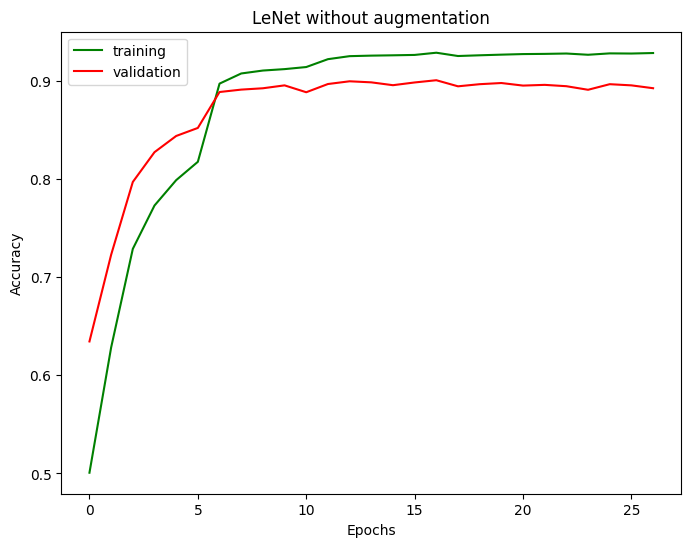

In [43]:
# Having a look at the training and validation accuracy

train_acc = history_v3.history['accuracy']
val_acc = history_v3.history['val_accuracy']

plt.figure(figsize=(8, 6))
plt.plot(np.arange(len(train_acc)), train_acc, c="g", label="training")
plt.plot(np.arange(len(val_acc)), val_acc, c="r", label="validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("LeNet without augmentation")
plt.legend()
plt.show()

Testing model performance on test set

In [75]:
# Load the current best model 
model_lenet_best = load_model("../models/model_lenet_best_accuracy.h5")

# # Define fucntion for loading and preprocessing the test images
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(256, 256), color_mode='rgb')
    img_array = img_to_array(img)
    img_array = img_array.astype('float32') / 255.0
    return img_array

test_images = []
for image_file in os.listdir(test_path):
    image_path = os.path.join(test_path, image_file)
    img_array = load_and_preprocess_image(image_path)
    test_images.append(img_array)

test_images = np.array(test_images)

In [76]:
predictions = model_lenet_best.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

class_indices = train_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}
predicted_classes_names = [class_names[idx] for idx in predicted_classes]

1/2 [==============>...............] - ETA: 0s

2024-12-12 14:28:19.520415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 116ms/step


In [78]:
for prediction, true_class in zip(predicted_classes_names, os.listdir(test_path)):
    print("Prediction:", prediction, "\t True class:", true_class)

Prediction: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot 	 True class: AppleScab3.JPG
Prediction: Tomato___Late_blight 	 True class: TomatoEarlyBlight2.JPG
Prediction: Tomato___Tomato_Yellow_Leaf_Curl_Virus 	 True class: TomatoEarlyBlight3.JPG
Prediction: Potato___healthy 	 True class: PotatoHealthy1.JPG
Prediction: Apple___Apple_scab 	 True class: AppleScab2.JPG
Prediction: Tomato___Early_blight 	 True class: TomatoEarlyBlight1.JPG
Prediction: Potato___Late_blight 	 True class: PotatoHealthy2.JPG
Prediction: Apple___Cedar_apple_rust 	 True class: AppleScab1.JPG
Prediction: Tomato___Bacterial_spot 	 True class: TomatoEarlyBlight4.JPG
Prediction: Tomato___Early_blight 	 True class: TomatoEarlyBlight5.JPG
Prediction: Tomato___Spider_mites Two-spotted_spider_mite 	 True class: TomatoEarlyBlight6.JPG
Prediction: Potato___Early_blight 	 True class: PotatoEarlyBlight4.JPG
Prediction: Potato___Early_blight 	 True class: PotatoEarlyBlight5.JPG
Prediction: Potato___Early_blight 	 True cla

In [79]:
test_comparison = pd.DataFrame({
    "Predictions": predicted_classes_names,
    "True_classes": os.listdir(test_path)
})

test_comparison["Correct"] = [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

display(test_comparison)



,Predictions,True_classes,Correct
0,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...,AppleScab3.JPG,0
1,Tomato___Late_blight,TomatoEarlyBlight2.JPG,0
2,Tomato___Tomato_Yellow_Leaf_Curl_Virus,TomatoEarlyBlight3.JPG,0
3,Potato___healthy,PotatoHealthy1.JPG,1
4,Apple___Apple_scab,AppleScab2.JPG,1
5,Tomato___Early_blight,TomatoEarlyBlight1.JPG,1
6,Potato___Late_blight,PotatoHealthy2.JPG,0
7,Apple___Cedar_apple_rust,AppleScab1.JPG,0
8,Tomato___Bacterial_spot,TomatoEarlyBlight4.JPG,0
9,Tomato___Early_blight,TomatoEarlyBlight5.JPG,1


In [80]:
test_comparison["Correct"].value_counts(normalize=True)

Correct
1    0.666667
0    0.333333
Name: proportion, dtype: float64